In [1]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import numpy as np
import itertools
import collections
import nltk
from nltk import bigrams
import networkx as nx

In [58]:
tweets = pd.read_csv('C:/Users/ACER/12 - 12.csv', engine="python", sep=',', quotechar='"', error_bad_lines=False)
print(tweets)

                                                   tweet
0      @zzzordem @ tolgaozcelkk90 because it ends wit...
1      Korona also let us know the number of our non-...
2      I graduated this year without ever seriously b...
3      @Newrozd @ jin_jiyane2121 after they go to bed...
4      Thanks to our students @ajanssp Example was it...
...                                                  ...
88736  60-year-old choir of 155 days after the patien...
88737  I look, I see many books now @pastdelusio the ...
88738  What was the runny noses plugged @handel Mask ...
88739  3 doctors girlfriend was 2 times corona,\nI Co...
88740  @feyzasays @bulutgulc Who he says no, but she ...

[88741 rows x 1 columns]


In [3]:
tweet= tweets["tweet"].str.split(',')
print (tweet)

0        [I think the process of Covidien-19 and pandem...
1        [@canan_erk @h_cilogl of the total number of d...
2        [Ztn was my grandmother's corona test was posi...
3              [@sinirlibirii would not have Korona sksk😂]
4        [He put the mask **\n"These countries are hidi...
                               ...                        
95649    [Kovid-19 test was made 115 thousand 523 in Tu...
95650    [Covidien our health in the process of countin...
95651    [___ @ 1kubr the following corona came over wi...
95652                    [Able to get what you Covidien O]
95653    [This corona vaccine began to be used in human...
Name: tweet, Length: 95654, dtype: object


In [4]:
#urel kaldırma

def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(txt)).split())

In [5]:
#url kaldırılmış halini çağırma

all_tweets_no_urls = [remove_url(tweet) for tweet in tweet]
all_tweets_no_urls[:5]

['I think the process of Covidien19 and pandemic exaggerated After that things in the world are waiting Overreaction caused by economic crisis unemployment and despair arising from occurring',
 'cananerk hcilogl of the total number of deaths in 2019 in bulundurup into account the increase in population 2020 Corona Corona external measurement of these deaths completely',
 'Ztn was my grandmothers corona test was positive in the positive for now my grandparents',
 'sinirlibirii would not have Korona sksk',
 'He put the mask nThese countries are hiding there in the choir you think you here that the choir OCD summit already had my scarf off my nose with my hand gloves direct mouth']

In [6]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in all_tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(-0.15,
 TextBlob("I think the process of Covidien19 and pandemic exaggerated After that things in the world are waiting Overreaction caused by economic crisis unemployment and despair arising from occurring"))

In [7]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[-0.15,
 'I think the process of Covidien19 and pandemic exaggerated After that things in the world are waiting Overreaction caused by economic crisis unemployment and despair arising from occurring']

In [8]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head(15)

,polarity,tweet
0,-0.150000,I think the process of Covidien19 and pandemic...
1,0.033333,cananerk hcilogl of the total number of deaths...
2,0.227273,Ztn was my grandmothers corona test was positi...
3,0.000000,sinirlibirii would not have Korona sksk
4,0.100000,He put the mask nThese countries are hiding th...
5,0.100000,ntv not correspond to how old they did in beat...
6,0.025000,What can you do that ahp Pendik astronotken ar...
7,0.045455,Is it enough to tell the second largest portio...
8,0.000000,Turkeys corona Table Case 412 thousand 65 Loss...
9,0.166667,Pasifagresif1 hakantunc4 trbznluuu the Bekarmi...


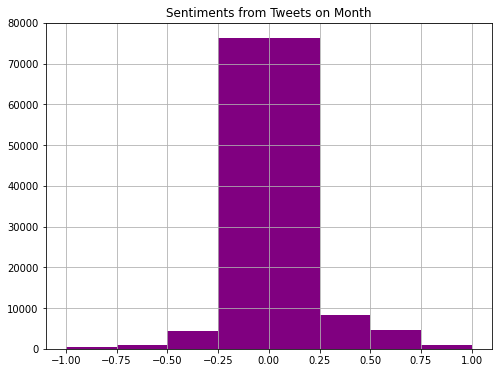

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Month")
plt.show()

In [10]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]

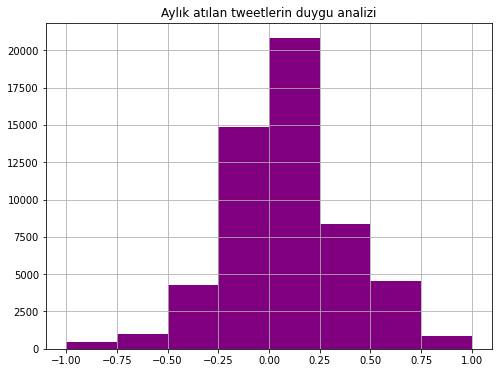

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Aylık atılan tweetlerin duygu analizi")
plt.show()

#BURAYI AL

In [12]:
# Remove polarity values equal to zero
pos_df =sentiment_df[sentiment_df.polarity > 0]
pos_df

,polarity,tweet
1,0.033333,cananerk hcilogl of the total number of deaths...
2,0.227273,Ztn was my grandmothers corona test was positi...
4,0.100000,He put the mask nThese countries are hiding th...
5,0.100000,ntv not correspond to how old they did in beat...
6,0.025000,What can you do that ahp Pendik astronotken ar...
...,...,...
95642,0.041061,leopronat yes I was there one high school in t...
95643,0.159091,CHP Kepez District Chairman Onur I have learne...
95644,0.400000,Aaa official went forward while I welcome the ...
95647,0.018750,I just want to go out and held prisoner for a ...


In [13]:
print(np.average(pos_df['polarity'])) #BURAYI AL

0.24781290694305874


In [14]:
pos_tweet= pos_df["tweet"].str.split(',')
print (pos_tweet)

1        [cananerk hcilogl of the total number of death...
2        [Ztn was my grandmothers corona test was posit...
4        [He put the mask nThese countries are hiding t...
5        [ntv not correspond to how old they did in bea...
6        [What can you do that ahp Pendik astronotken a...
                               ...                        
95642    [leopronat yes I was there one high school in ...
95643    [CHP Kepez District Chairman Onur I have learn...
95644    [Aaa official went forward while I welcome the...
95647    [I just want to go out and held prisoner for a...
95652                    [Able to get what you Covidien O]
Name: tweet, Length: 34528, dtype: object


In [15]:
#urel kaldırma

def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(txt)).split())

In [16]:
#url kaldırılmış halini çağırma

pos_all_tweets_no_urls = [remove_url(tweet) for tweet in pos_tweet]
pos_all_tweets_no_urls[:5]

['cananerk hcilogl of the total number of deaths in 2019 in bulundurup into account the increase in population 2020 Corona Corona external measurement of these deaths completely',
 'Ztn was my grandmothers corona test was positive in the positive for now my grandparents',
 'He put the mask nThese countries are hiding there in the choir you think you here that the choir OCD summit already had my scarf off my nose with my hand gloves direct mouth',
 'ntv not correspond to how old they did in beating the disease dzmeceb of the koronayyoks to choose their man even to the choir',
 'What can you do that ahp Pendik astronotken are allergic We are always stuffy nose that youre already getting hard to breathe I would refer to God the whole team including the Minister particularly Korona']

In [17]:
# Create a list of lists containing lowercase words for each tweet; url olmadan küçük harflere ayırma #tokenizer
pos_words_in_tweet = [tweet.lower().split() for tweet in pos_all_tweets_no_urls]
pos_words_in_tweet[:2]

[['cananerk',
  'hcilogl',
  'of',
  'the',
  'total',
  'number',
  'of',
  'deaths',
  'in',
  '2019',
  'in',
  'bulundurup',
  'into',
  'account',
  'the',
  'increase',
  'in',
  'population',
  '2020',
  'corona',
  'corona',
  'external',
  'measurement',
  'of',
  'these',
  'deaths',
  'completely'],
 ['ztn',
  'was',
  'my',
  'grandmothers',
  'corona',
  'test',
  'was',
  'positive',
  'in',
  'the',
  'positive',
  'for',
  'now',
  'my',
  'grandparents']]

In [18]:
# List of all words across tweets; kelimelerin sayılması
pos_all_words_no_urls = list(itertools.chain(*pos_words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(pos_all_words_no_urls)

counts_no_urls.most_common(15)

[('the', 60373),
 ('to', 30404),
 ('of', 26523),
 ('in', 20745),
 ('i', 12993),
 ('a', 12717),
 ('and', 11969),
 ('not', 11947),
 ('is', 11547),
 ('you', 9608),
 ('corona', 9314),
 ('covidien', 8506),
 ('we', 7623),
 ('that', 6958),
 ('our', 6411)]

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
#var olanların gösterimi
from nltk.corpus import stopwords
pos_stop_words = set(stopwords.words('english'))

# View a few words from the set
list(pos_stop_words)[0:10]

['at', 'i', 'their', 'through', 'while', 'the', 'mightn', 'does', 'an', 'on']

In [21]:
# Remove stop words from each tweet list of words; kaldırılmış durumu
pos_tweets_nsw = [[word for word in tweet_words if not word in pos_stop_words]
              for tweet_words in pos_words_in_tweet]

pos_tweets_nsw[0]

['cananerk',
 'hcilogl',
 'total',
 'number',
 'deaths',
 '2019',
 'bulundurup',
 'account',
 'increase',
 'population',
 '2020',
 'corona',
 'corona',
 'external',
 'measurement',
 'deaths',
 'completely']

In [22]:
#çok kullanılanlara tekrar bakılırsa
pos_all_words_nsw = list(itertools.chain(*pos_tweets_nsw))

pos_counts_nsw = collections.Counter(pos_all_words_nsw)

pos_counts_nsw.most_common(15)

[('corona', 9314),
 ('covidien', 8506),
 ('covidien19', 4590),
 ('people', 4282),
 ('new', 4012),
 ('virus', 3786),
 ('positive', 3721),
 ('get', 2641),
 ('health', 2621),
 ('test', 2526),
 ('choir', 2518),
 ('covid19', 2495),
 ('kovid19', 2389),
 ('also', 2178),
 ('first', 2096)]

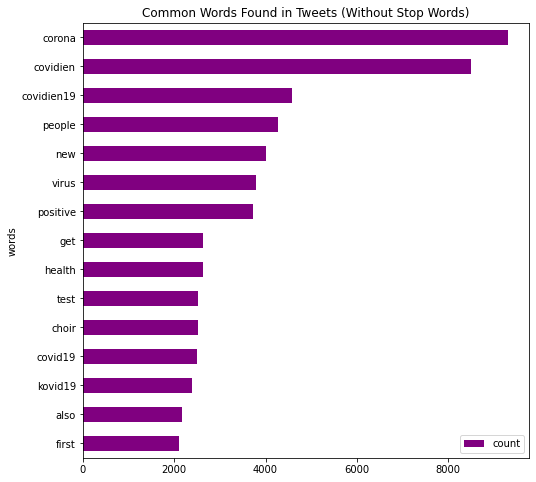

In [23]:
#görselleştirme
pos_clean_tweets_nsw = pd.DataFrame(pos_counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
pos_clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [24]:
#arama kelimesinin kaldırılması

pos_collection_words = ['corona', 'coronavirues', 'coronarovirus', 'covid', 'virus', 
                    'also', '2020', 'coronavirus', 'us', 'get', 'new', 'coro', 
                    'covid19', 'covidien19', 'covidien', '19', 'im', 'korona', 'chinese', 
                        'last', 'breaking', 'one', 'even', 'kovid19', '24' ]
pos_tweets_nsw_nc = [[w for w in word if not w in pos_collection_words]
                 for word in pos_tweets_nsw]
pos_tweets_nsw[0]

['cananerk',
 'hcilogl',
 'total',
 'number',
 'deaths',
 '2019',
 'bulundurup',
 'account',
 'increase',
 'population',
 '2020',
 'corona',
 'corona',
 'external',
 'measurement',
 'deaths',
 'completely']

In [25]:
# Flatten list of words in clean tweets    #BURAYI AL
pos_all_words_nsw_nc = list(itertools.chain(*pos_tweets_nsw_nc))

# Create counter of words in clean tweets
pos_counts_nsw_nc = collections.Counter(pos_all_words_nsw_nc)

pos_counts_nsw_nc.most_common(15)  

[('people', 4282),
 ('positive', 3721),
 ('health', 2621),
 ('test', 2526),
 ('choir', 2518),
 ('first', 2096),
 ('number', 2094),
 ('measures', 1926),
 ('cases', 1720),
 ('would', 1632),
 ('good', 1598),
 ('said', 1589),
 ('days', 1510),
 ('hospital', 1499),
 ('patients', 1474)]

In [26]:
pos_clean_tweets_ncw = pd.DataFrame(pos_counts_nsw_nc.most_common(15), # en fazla değişken kelime buradan değişir
                             columns=['words', 'count'])
pos_clean_tweets_ncw.head()

,words,count
0,people,4282
1,positive,3721
2,health,2621
3,test,2526
4,choir,2518


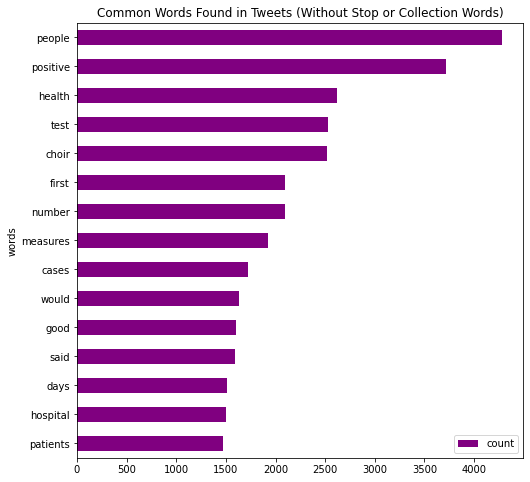

In [27]:
fig, ax = plt.subplots(figsize=(8, 8)) #çıktının boyutu 

# Plot horizontal bar graph
pos_clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)") #başlık

plt.show()

In [28]:
#Explore Co-occurring Words
# Create list of lists containing bigrams in tweets
pos_terms_bigram = [list(bigrams(tweet)) for tweet in pos_tweets_nsw_nc]

# View bigrams for the first tweet
pos_terms_bigram[0]

[('cananerk', 'hcilogl'),
 ('hcilogl', 'total'),
 ('total', 'number'),
 ('number', 'deaths'),
 ('deaths', '2019'),
 ('2019', 'bulundurup'),
 ('bulundurup', 'account'),
 ('account', 'increase'),
 ('increase', 'population'),
 ('population', 'external'),
 ('external', 'measurement'),
 ('measurement', 'deaths'),
 ('deaths', 'completely')]

In [29]:
# Flatten list of bigrams in clean tweets      BURAYI AL
pos_bigrams = list(itertools.chain(*pos_terms_bigram))

# Create counter of words in clean bigrams
pos_bigram_counts = collections.Counter(pos_bigrams)

pos_bigram_counts.most_common(15)

[(('tested', 'positive'), 662),
 (('test', 'positive'), 511),
 (('number', 'cases'), 484),
 (('lost', 'lives'), 361),
 (('general', 'manager'), 360),
 (('social', 'distance'), 347),
 (('mustafa', 'live'), 333),
 (('health', 'workers'), 303),
 (('intensive', 'care'), 280),
 (('health', 'care'), 257),
 (('positive', 'test'), 255),
 (('every', 'day'), 246),
 (('first', 'time'), 233),
 (('measures', 'taken'), 231),
 (('infect', 'people'), 229)]

In [30]:
pos_bigram_df = pd.DataFrame(pos_bigram_counts.most_common(15),
                             columns=['bigram', 'count'])

pos_bigram_df

,bigram,count
0,"(tested, positive)",662
1,"(test, positive)",511
2,"(number, cases)",484
3,"(lost, lives)",361
4,"(general, manager)",360
5,"(social, distance)",347
6,"(mustafa, live)",333
7,"(health, workers)",303
8,"(intensive, care)",280
9,"(health, care)",257


In [31]:
# Create dictionary of bigrams and their counts
d = pos_bigram_df.set_index('bigram').T.to_dict('records')

In [32]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)

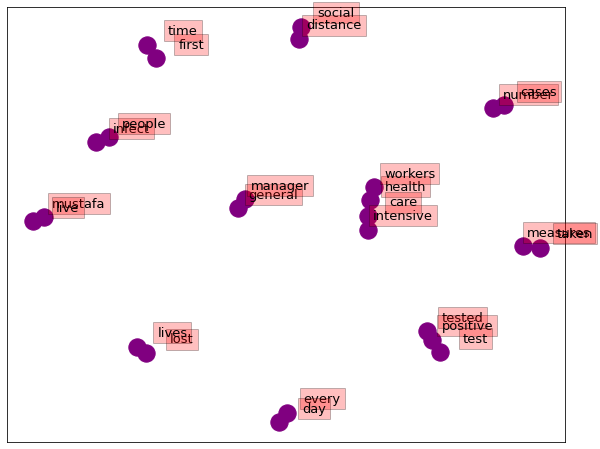

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

#burayı al

# negatif uygulama 

In [34]:
# Remove polarity values equal to zero
neg_df =sentiment_df[sentiment_df.polarity < 0]
neg_df

,polarity,tweet
0,-0.150000,I think the process of Covidien19 and pandemic...
14,-0.181818,Today we engage once again with a new exciteme...
31,-0.011364,Zlatann the Kovid19 tested positive We say get...
32,-0.263889,I do not like uncertainty and wait for no man ...
40,-0.700000,Zlatan Covidien stood up to challenge me Bad idea
...,...,...
95627,-0.194792,Half of the water remaining half of the countr...
95632,-0.100000,door closed wrapped around walks among us neve...
95641,-0.300000,Covit19 test is negative So allergic asthma tr...
95645,-0.300000,corona test negative ckt


In [35]:
print(np.average(neg_df['polarity'])) #burayı al

-0.2113230429680925


In [36]:
print(np.average(sentiment_df['polarity'])) #genel ortalama

0.07644849179442323


In [37]:
neg_tweet= neg_df["tweet"].str.split(',')
print (neg_tweet)

0        [I think the process of Covidien19 and pandemi...
14       [Today we engage once again with a new excitem...
31       [Zlatann the Kovid19 tested positive We say ge...
32       [I do not like uncertainty and wait for no man...
40       [Zlatan Covidien stood up to challenge me Bad ...
                               ...                        
95627    [Half of the water remaining half of the count...
95632    [door closed wrapped around walks among us nev...
95641    [Covit19 test is negative So allergic asthma t...
95645                           [corona test negative ckt]
95651    [1kubr the following corona came over with a h...
Name: tweet, Length: 20561, dtype: object


In [38]:
#url kaldırılmış halini çağırma

neg_all_tweets_no_urls = [remove_url(tweet) for tweet in neg_tweet]
neg_all_tweets_no_urls[:5]


['I think the process of Covidien19 and pandemic exaggerated After that things in the world are waiting Overreaction caused by economic crisis unemployment and despair arising from occurring',
 'Today we engage once again with a new excitement for our Yusufeli District congressional measures Covidien19 as a contact it was under quarantine too despite my desire to unfortunately could not attend',
 'Zlatann the Kovid19 tested positive We say get past the corona or',
 'I do not like uncertainty and wait for no man Covidien test can also be extremely nervous What youre going to be quick my life is very boring to stay in uncertainty',
 'Zlatan Covidien stood up to challenge me Bad idea']

In [39]:
# Create a list of lists containing lowercase words for each tweet; url olmadan küçük harflere ayırma #tokenizer
neg_words_in_tweet = [tweet.lower().split() for tweet in neg_all_tweets_no_urls]
neg_words_in_tweet[:2]


[['i',
  'think',
  'the',
  'process',
  'of',
  'covidien19',
  'and',
  'pandemic',
  'exaggerated',
  'after',
  'that',
  'things',
  'in',
  'the',
  'world',
  'are',
  'waiting',
  'overreaction',
  'caused',
  'by',
  'economic',
  'crisis',
  'unemployment',
  'and',
  'despair',
  'arising',
  'from',
  'occurring'],
 ['today',
  'we',
  'engage',
  'once',
  'again',
  'with',
  'a',
  'new',
  'excitement',
  'for',
  'our',
  'yusufeli',
  'district',
  'congressional',
  'measures',
  'covidien19',
  'as',
  'a',
  'contact',
  'it',
  'was',
  'under',
  'quarantine',
  'too',
  'despite',
  'my',
  'desire',
  'to',
  'unfortunately',
  'could',
  'not',
  'attend']]

In [40]:
# List of all words across tweets; kelimelerin sayılması
neg_all_words_no_urls = list(itertools.chain(*neg_words_in_tweet))


In [41]:
# Create counter
counts_no_urls = collections.Counter(neg_all_words_no_urls)

counts_no_urls.most_common(15)


[('the', 33579),
 ('to', 18397),
 ('of', 14196),
 ('in', 11449),
 ('i', 8392),
 ('not', 8222),
 ('a', 7259),
 ('is', 7232),
 ('corona', 6251),
 ('and', 5944),
 ('you', 5670),
 ('covidien', 5400),
 ('that', 3962),
 ('my', 3950),
 ('was', 3943)]

In [42]:
#var olanların gösterimi
from nltk.corpus import stopwords
neg_stop_words = set(stopwords.words('english'))

# View a few words from the set
list(neg_stop_words)[0:10]


['at', 'i', 'their', 'through', 'while', 'the', 'mightn', 'does', 'an', 'on']

In [43]:
# Remove stop words from each tweet list of words; kaldırılmış durumu
neg_tweets_nsw = [[word for word in tweet_words if not word in neg_stop_words]
              for tweet_words in neg_words_in_tweet]

neg_tweets_nsw[0]


['think',
 'process',
 'covidien19',
 'pandemic',
 'exaggerated',
 'things',
 'world',
 'waiting',
 'overreaction',
 'caused',
 'economic',
 'crisis',
 'unemployment',
 'despair',
 'arising',
 'occurring']

In [44]:
#çok kullanılanlara tekrar bakılırsa
neg_all_words_nsw = list(itertools.chain(*neg_tweets_nsw))

neg_counts_nsw = collections.Counter(neg_all_words_nsw)

neg_counts_nsw.most_common(15)


[('corona', 6251),
 ('covidien', 5400),
 ('people', 2779),
 ('covidien19', 2254),
 ('virus', 2042),
 ('due', 1978),
 ('get', 1949),
 ('im', 1647),
 ('choir', 1625),
 ('kovid19', 1495),
 ('test', 1487),
 ('also', 1435),
 ('number', 1350),
 ('health', 1327),
 ('covid19', 1235)]

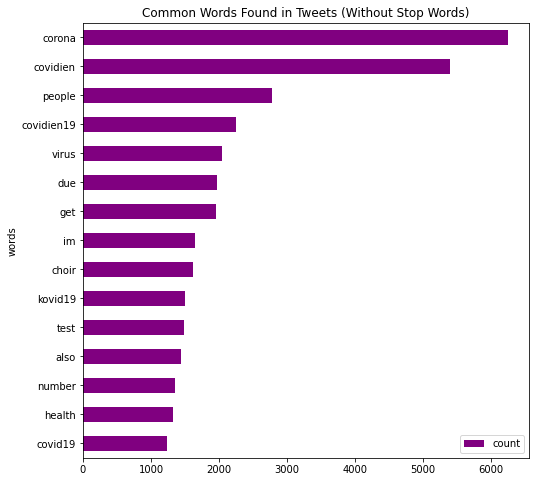

In [45]:

#görselleştirme
neg_clean_tweets_nsw = pd.DataFrame(neg_counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
neg_clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()


In [46]:
#arama kelimesinin kaldırılması

neg_collection_words = ['corona', 'coronavirues', 'coronarovirus', 'covid', 'virus', 
                    'also', '2020', 'coronavirus', 'us', 'get', 'new', 'coro', 
                    'covid19', 'covidien19', 'covidien', '19', 'im', 'korona', 
                        'chinese', 'last', 'breaking', 'one', 'even', 'kovid19', '24'  ]
neg_tweets_nsw_nc = [[w for w in word if not w in neg_collection_words]
                 for word in neg_tweets_nsw]
neg_tweets_nsw[0]


['think',
 'process',
 'covidien19',
 'pandemic',
 'exaggerated',
 'things',
 'world',
 'waiting',
 'overreaction',
 'caused',
 'economic',
 'crisis',
 'unemployment',
 'despair',
 'arising',
 'occurring']

In [47]:
# Flatten list of words in clean tweets Burayı al
neg_all_words_nsw_nc = list(itertools.chain(*neg_tweets_nsw_nc))

# Create counter of words in clean tweets
neg_counts_nsw_nc = collections.Counter(neg_all_words_nsw_nc)

neg_counts_nsw_nc.most_common(15)   


[('people', 2779),
 ('due', 1978),
 ('choir', 1625),
 ('test', 1487),
 ('number', 1350),
 ('health', 1327),
 ('negative', 1011),
 ('past', 1003),
 ('say', 982),
 ('go', 978),
 ('days', 952),
 ('think', 948),
 ('like', 911),
 ('patients', 873),
 ('said', 856)]

In [48]:
neg_clean_tweets_ncw = pd.DataFrame(neg_counts_nsw_nc.most_common(15), # en fazla değişken kelime buradan değişir
                             columns=['words', 'count'])
neg_clean_tweets_ncw.head()



,words,count
0,people,2779
1,due,1978
2,choir,1625
3,test,1487
4,number,1350


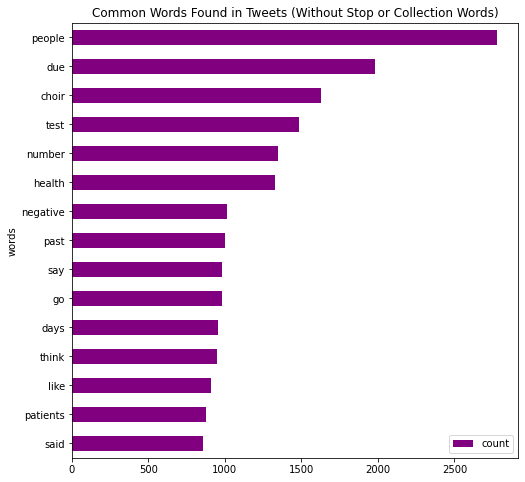

In [49]:
fig, ax = plt.subplots(figsize=(8, 8)) #çıktının boyutu 

# Plot horizontal bar graph
neg_clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)") #başlık

plt.show()


In [50]:
#Explore Co-occurring Words
# Create list of lists containing bigrams in tweets
neg_terms_bigram = [list(bigrams(tweet)) for tweet in neg_tweets_nsw_nc]

# View bigrams for the first tweet
neg_terms_bigram[0]


[('think', 'process'),
 ('process', 'pandemic'),
 ('pandemic', 'exaggerated'),
 ('exaggerated', 'things'),
 ('things', 'world'),
 ('world', 'waiting'),
 ('waiting', 'overreaction'),
 ('overreaction', 'caused'),
 ('caused', 'economic'),
 ('economic', 'crisis'),
 ('crisis', 'unemployment'),
 ('unemployment', 'despair'),
 ('despair', 'arising'),
 ('arising', 'occurring')]

In [51]:
# Flatten list of bigrams in clean tweets      BURAYI AL
neg_bigrams = list(itertools.chain(*neg_terms_bigram))

# Create counter of words in clean bigrams
neg_bigram_counts = collections.Counter(neg_bigrams)

neg_bigram_counts.most_common(15)


[(('lost', 'lives'), 371),
 (('people', 'lost'), 266),
 (('lives', 'due'), 230),
 (('test', 'negative'), 221),
 (('number', 'cases'), 201),
 (('seriously', 'ill'), 198),
 (('health', 'workers'), 193),
 (('intensive', 'care'), 179),
 (('every', 'day'), 175),
 (('past', 'hours'), 172),
 (('number', 'seriously'), 169),
 (('tested', 'positive'), 152),
 (('people', 'killed'), 152),
 (('health', 'care'), 149),
 (('came', 'back'), 144)]

In [52]:
neg_bigram_df = pd.DataFrame(neg_bigram_counts.most_common(15),
                             columns=['bigram', 'count'])

neg_bigram_df


,bigram,count
0,"(lost, lives)",371
1,"(people, lost)",266
2,"(lives, due)",230
3,"(test, negative)",221
4,"(number, cases)",201
5,"(seriously, ill)",198
6,"(health, workers)",193
7,"(intensive, care)",179
8,"(every, day)",175
9,"(past, hours)",172


In [53]:
# Create dictionary of bigrams and their counts
d = neg_bigram_df.set_index('bigram').T.to_dict('records')


In [54]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)


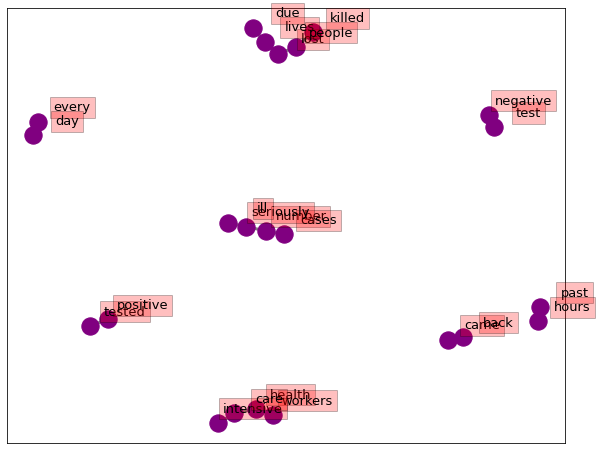

In [55]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

#BURAYI AL
